# Milestone 2 analysis


# Task 1 

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stsc

In [53]:
df = pd.read_csv("../../data/raw/Video_game_sales_db.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


---

In [30]:
dfNa = pd.read_csv("../../data/raw/Video_game_sales_db.csv",
                  usecols = ["Rank", "Name", "Genre", "NA_Sales", "Year", "Platform"])
dfNa

,Rank,Name,Platform,Year,Genre,NA_Sales
0,1,Wii Sports,Wii,2006.0,Sports,41.49
1,2,Super Mario Bros.,NES,1985.0,Platform,29.08
2,3,Mario Kart Wii,Wii,2008.0,Racing,15.85
3,4,Wii Sports Resort,Wii,2009.0,Sports,15.75
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27
...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00
16596,16599,Know How 2,DS,2010.0,Puzzle,0.00


In [31]:
dfNa.dropna(axis = 1)
dfNa.reset_index(drop=True)

,Rank,Name,Platform,Year,Genre,NA_Sales
0,1,Wii Sports,Wii,2006.0,Sports,41.49
1,2,Super Mario Bros.,NES,1985.0,Platform,29.08
2,3,Mario Kart Wii,Wii,2008.0,Racing,15.85
3,4,Wii Sports Resort,Wii,2009.0,Sports,15.75
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27
...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00
16596,16599,Know How 2,DS,2010.0,Puzzle,0.00


In [94]:
dfWii = (
    pd.read_csv("../../data/raw/Video_game_sales_db.csv",
    usecols = ["Rank", "Name", "Genre", "Global_Sales", "Year", "Platform"])
    .loc[lambda x: x["Platform"] == "Wii"] # We love Wii only wanna play Wii
    .loc[lambda x: x["Year"] >= 2000] # Check for only recent games 
    .loc[lambda x: x["Rank"] <= 2500] # Nothing ranked lower tan 2500
    .sort_values(by= "Global_Sales", ascending = False) # Cash money check
    .assign(Averaged_Sales = lambda x: x["Global_Sales"]/4) # Average out sales
    .reset_index(drop = True)
)
dfWii

,Rank,Name,Platform,Year,Genre,Global_Sales,Averaged_Sales
0,1,Wii Sports,Wii,2006.0,Sports,82.74,20.6850
1,3,Mario Kart Wii,Wii,2008.0,Racing,35.82,8.9550
2,4,Wii Sports Resort,Wii,2009.0,Sports,33.00,8.2500
3,8,Wii Play,Wii,2006.0,Misc,29.02,7.2550
4,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,28.62,7.1550
...,...,...,...,...,...,...,...
194,2440,Blazing Angels: Squadrons of WWII,Wii,2007.0,Simulation,0.85,0.2125
195,2452,Karaoke Revolution Glee,Wii,2010.0,Misc,0.85,0.2125
196,2467,Harvest Moon: Tree of Tranquility,Wii,2007.0,Simulation,0.84,0.2100
197,2482,WWE SmackDown vs. Raw 2009,Wii,2008.0,Fighting,0.83,0.2075


In [34]:
# Setting the styles of the graphs following
sns.set_style("dark")
sns.set_theme(font_scale = 1, color_codes = True)


<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<AxesSubplot:xlabel='Averaged_Sales', ylabel='Genre'>

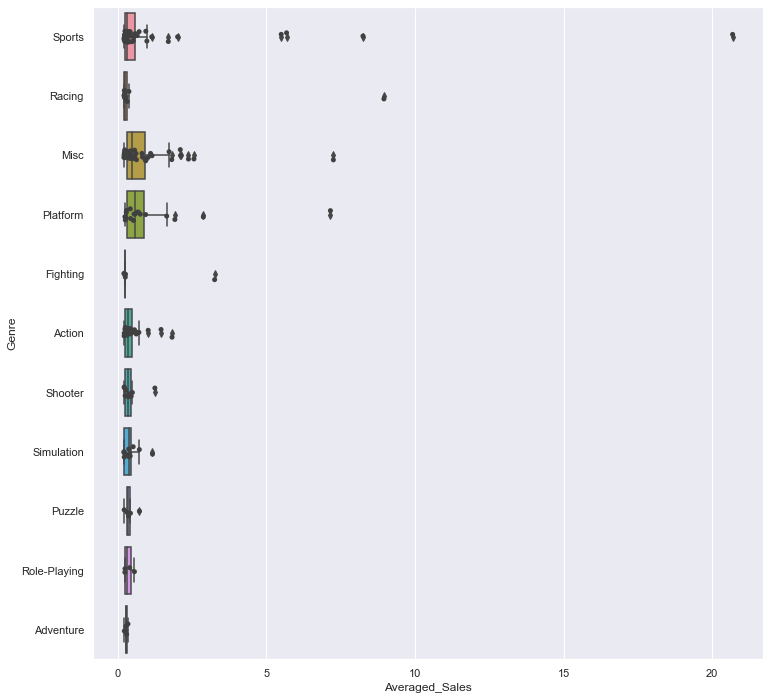

In [45]:
# Investigating Wii average sales per genre after year 2000, only running with games 
# ranked higher than 2500
# this to display the box plot
plt.figure(figsize=(12, 12))
sns.boxplot(data = dfWiiSub, x = "Averaged_Sales", y = "Genre", whis = 1.5)
# swarm plot to display the datapoints over the box plot
sns.stripplot(data = dfWiiSub, x = "Averaged_Sales", y = "Genre", color = "0.25")

In [36]:
dfClean = (
        pd.read_csv("../../data/raw/Video_game_sales_db.csv",
        usecols = ["Rank", "Name", "Genre", "Global_Sales", "Year", "Platform"]) # So far our only focus of work
        .sort_values(by= "Global_Sales", ascending = False) # Cash money check
        .dropna(axis = 1) # Drop any NA values completely
        .reset_index(drop=True) # Reset index so we don't mess up orders
    )
dfClean

,Rank,Name,Platform,Genre,Global_Sales
0,1,Wii Sports,Wii,Sports,82.74
1,2,Super Mario Bros.,NES,Platform,40.24
2,3,Mario Kart Wii,Wii,Racing,35.82
3,4,Wii Sports Resort,Wii,Sports,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,31.37
...,...,...,...,...,...
16593,16189,BattleForge,PC,Strategy,0.01
16594,16190,Jewel Quest II,PC,Puzzle,0.01
16595,16191,Toro to Morimori,PS3,Misc,0.01
16596,16192,Sonic & All-Stars Racing Transformed,PC,Racing,0.01


In [87]:
def load_and_process_Wii(filePath):

    dfClean = (
        pd.read_csv(filePath,
        usecols = ["Rank", "Name", "Genre", "Global_Sales", "Year", "Platform"]) # So far our only focus of work
        .sort_values(by= "Global_Sales", ascending = False) # Cash money check
        .dropna(axis = 0, thresh = 3) # Drop any NA values completely
        .reset_index(drop=True) # Reset index so we don't mess up orders
    )
    
    dfWii = (
        dfClean
        .loc[lambda x: x["Platform"] == "Wii"] # We love Wii only wanna play Wii
        .loc[lambda x: x["Year"] >= 2000] # Check for only recent games
        .loc[lambda x: x["Rank"] <= 2500] # Nothing ranked lower tan 2500
        .loc[lambda x: x["Global_Sales"].between(0, 50.00)] # Remove the overkill outlier Wii sport saes at 80
        .assign(Averaged_Sales = lambda x: x["Global_Sales"]/4) # Average out sales
        .sort_values(by= "Global_Sales", ascending = False) # Re-sort in case any vales got changed
        .reset_index(drop = True) # Order things nicely
    )
    return dfWii


In [97]:
dfWiiN = load_and_process_Wii("../../data/raw/Video_game_sales_db.csv")
dfWiiN

,Rank,Name,Platform,Year,Genre,Global_Sales,Averaged_Sales
0,3,Mario Kart Wii,Wii,2008.0,Racing,35.82,8.9550
1,4,Wii Sports Resort,Wii,2009.0,Sports,33.00,8.2500
2,8,Wii Play,Wii,2006.0,Misc,29.02,7.2550
3,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,28.62,7.1550
4,14,Wii Fit,Wii,2007.0,Sports,22.72,5.6800
...,...,...,...,...,...,...,...
193,2440,Blazing Angels: Squadrons of WWII,Wii,2007.0,Simulation,0.85,0.2125
194,2433,Need for Speed: Nitro,Wii,2009.0,Racing,0.85,0.2125
195,2467,Harvest Moon: Tree of Tranquility,Wii,2007.0,Simulation,0.84,0.2100
196,2497,The Price is Right,Wii,2008.0,Misc,0.83,0.2075


<AxesSubplot:xlabel='Averaged_Sales', ylabel='Genre'>

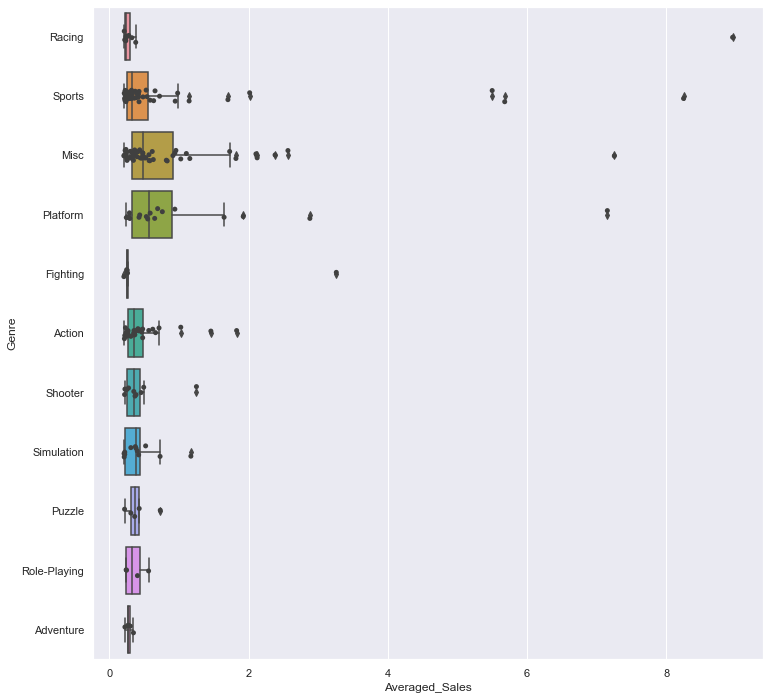

In [98]:
# Investigating Wii average sales per genre after year 2000, only running with games 
# ranked higher than 2500
# this to display the box plot
plt.figure(figsize=(12, 12))
sns.boxplot(data = dfWiiN, x = "Averaged_Sales", y = "Genre", whis = 1.5)
# swarm plot to display the datapoints over the box plot
sns.stripplot(data = dfWiiN, x = "Averaged_Sales", y = "Genre", color = "0.25")

### Will have to resolve the issue of representing sales while dealing with certain too good selling Nintendo titles


## Starting analysis round 2 of Nintendo sales over the years


In [202]:
def load_and_process_Nintendo(filePath):
    import pandas as pd
    dfClean = (
        pd.read_csv(filePath,
        usecols = ["Rank", "Name", "Publisher", "Platform", "Genre", "Global_Sales", "Year"]) # So far our only focus of work
        .sort_values(by= "Global_Sales", ascending = False) # Cash money check
        .dropna(axis = 0, thresh = 3) # Drop any NA values completely
        .loc[lambda x: x["Global_Sales"].between(5, 90.00)] # Remove the overkill outlier Wii sport saes at 80
        #Excessive low number sales mess up our median so we are removing it for now by specifying values between 5-90
        .reset_index(drop=True) # Reset index so we don't mess up orders
    )

   # print(stsc.median(dfClean["Global_Sales"]))
   # print(stsc.mean(dfClean["Global_Sales"]))

    dfWii = (
        dfClean
        .loc[(dfClean["Publisher"] == "Nintendo")]
        #.loc[(dfClean["Platform"] == "Wii") | (dfClean["Platform"] == "DS")]
        .loc[lambda x: x["Year"] >= 2000] # Check for only recent games
        .loc[lambda x: x["Rank"] <= 2500] # Nothing ranked lower tan 2500
        .assign(median = stsc.median(dfClean["Global_Sales"]))
        .assign(Averaged_Sales = lambda x: x["Global_Sales"]/stsc.median(dfClean["Global_Sales"])) #Putting the sales number over its median to try and mitigate issues from the outliers
        .sort_values(by= "Global_Sales", ascending = False) # Re-sort in case any vales got changed
        .reset_index(drop = True) # Order things nicely
    )
    return dfWii

In [203]:
dfNin = load_and_process_Nintendo("../../data/raw/Video_game_sales_db.csv")
dfNin

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales,median,Averaged_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74,7.23,11.443983
1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82,7.23,4.954357
2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00,7.23,4.564315
3,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,30.01,7.23,4.150761
4,8,Wii Play,Wii,2006.0,Misc,Nintendo,29.02,7.23,4.013831
5,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,28.62,7.23,3.958506
6,11,Nintendogs,DS,2005.0,Simulation,Nintendo,24.76,7.23,3.424620
7,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,23.42,7.23,3.239281
8,14,Wii Fit,Wii,2007.0,Sports,Nintendo,22.72,7.23,3.142462
9,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,22.00,7.23,3.042877


<AxesSubplot:xlabel='Year', ylabel='Averaged_Sales'>

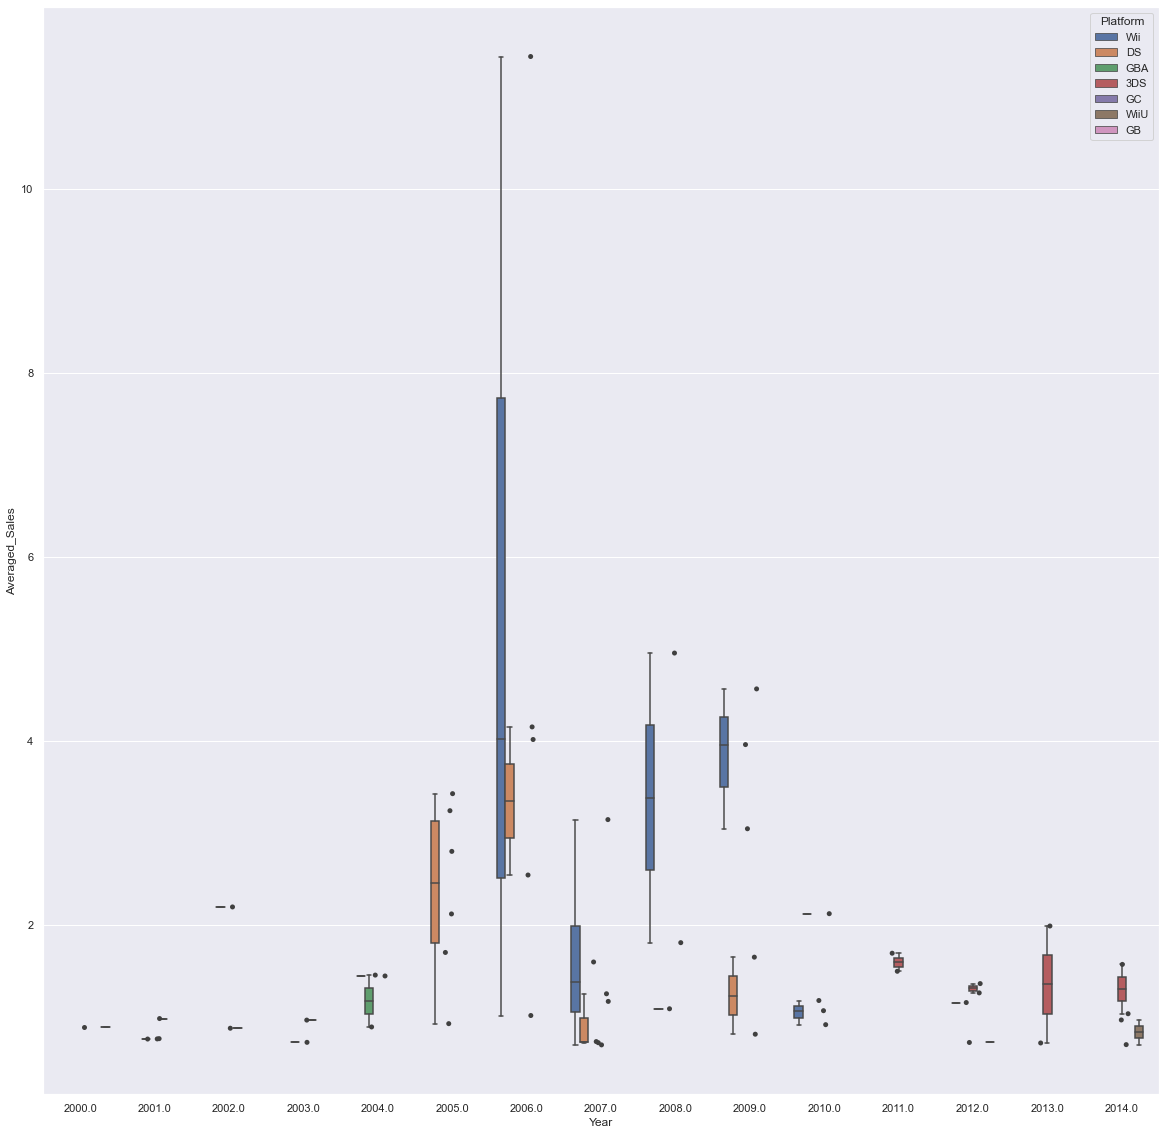

In [204]:
plt.figure(figsize=(20, 20))
sns.boxplot(data = dfNin, x = "Year", y = "Averaged_Sales", whis = 1.5, hue ="Platform")
# swarm plot to display the datapoints over the box plot
sns.stripplot(data = dfNin, x = "Year", y = "Averaged_Sales", color = "0.25")